In [1]:
%run "Common setup.ipynb"

Here we define convergence as referring to the stability of the sensitivity indices (as in Herman et al. 2017).

**eFAST**

In [2]:
param_values = fast_sampler(SPEC_WITH_INACTIVE, NUM_FAST_SAMPLES, M=4, seed=SEED_VALUE)
Y = Ishigami.evaluate(param_values)
Si_inactive = fast_analyzer(SPEC_WITH_INACTIVE, Y, print_to_console=False)
Si_inactive.to_df().round(4)

,S1,ST
x1,0.3076,0.5528
x2,0.4424,0.4483
x3,0.0000,0.2393
x4,0.0000,0.0453


In [3]:
M_test = 15
num_efast_samples = (4*M_test**2)+1

print("Samples:", num_efast_samples)

efast_set = fast_sampler(SPEC_WITH_INACTIVE, num_efast_samples, M=M_test, seed=SEED_VALUE)
Y = Ishigami.evaluate(efast_set)
Si_inactive = fast_analyzer(SPEC_WITH_INACTIVE, Y, print_to_console=False)
Si_inactive.to_df().round(4)

Samples: 901


,S1,ST
x1,0.0,0.1554
x2,0.0,0.6638
x3,0.0,0.2417
x4,0.0,0.0000


In [4]:
M_test = 4
num_efast_samples = (4*M_test**2)+1

print("Samples:", num_efast_samples)

efast_set = fast_sampler(SPEC_WITH_INACTIVE, num_efast_samples, M=M_test, seed=SEED_VALUE)
Y = Ishigami.evaluate(efast_set)
Si_inactive = fast_analyzer(SPEC_WITH_INACTIVE, Y, print_to_console=False)
Si_inactive.to_df().round(4)

Samples: 65


,S1,ST
x1,0.3604,0.6227
x2,0.6659,0.6926
x3,0.0269,0.2360
x4,0.0001,0.0273


[Text(0, 0, '8'),
 Text(0, 0, '16'),
 Text(0, 0, '32'),
 Text(0, 0, '64'),
 Text(0, 0, '128'),
 Text(0, 0, '256'),
 Text(0, 0, '512'),
 Text(0, 0, '1024'),
 Text(0, 0, '2048'),
 Text(0, 0, '4096'),
 Text(0, 0, '8192'),
 Text(0, 0, '16384'),
 Text(0, 0, '32768'),
 Text(0, 0, '65536')]

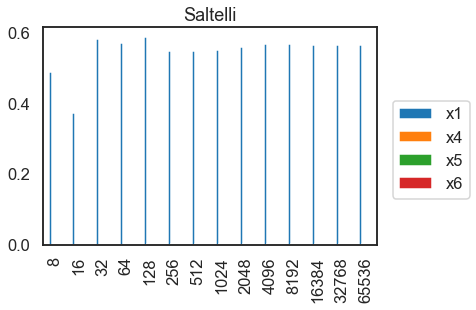

In [4]:
num_saltelli_samples = [2**n for n in range(3, 16+1)]

inactive_spec = create_dummy_spec(3) # spec for Ishigami with 3 extra terms

x1_ST = []
x4_ST = []
x5_ST = []
x6_ST = []
for n_samples in num_saltelli_samples:
    # Generate samples
    saltelli_w_inactive = saltelli.sample(inactive_spec, n_samples, seed=SEED_VALUE, calc_second_order=False)

    # Run conditional Ishigami
    # $x_1$ has to be > 1.0 for 6th term to influence output.
    saltelli_Y = mod_ishigami(saltelli_w_inactive, 3.0, [5, 6])

    Si_saltelli = sobol.analyze(inactive_spec, saltelli_Y, print_to_console=False, calc_second_order=False)

    Saltelli_T, Saltelli_1st = Si_saltelli.to_df()
    
    x1_ST.append(Saltelli_T.loc['x1'][0])
    x4_ST.append(Saltelli_T.loc['x4'][0])
    x5_ST.append(Saltelli_T.loc['x5'][0])
    x6_ST.append(Saltelli_T.loc['x6'][0])
# End for

ax = pd.DataFrame({'x1': x1_ST, 'x4': x4_ST, 'x5': x5_ST, 'x6': x6_ST}).plot(kind='bar')
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.title('Saltelli'.format(max(num_saltelli_samples)))
ax.set_xticklabels(num_saltelli_samples);